# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter
from util.Save_result_return import save_to_csv

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None

## Getting the Data

In [4]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [5]:
Currency_Pair = 'XAGUSD'

## TF D1

In [6]:
TF = 'D1'

In [7]:
data_1 = XAUUSD[TF]

In [8]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

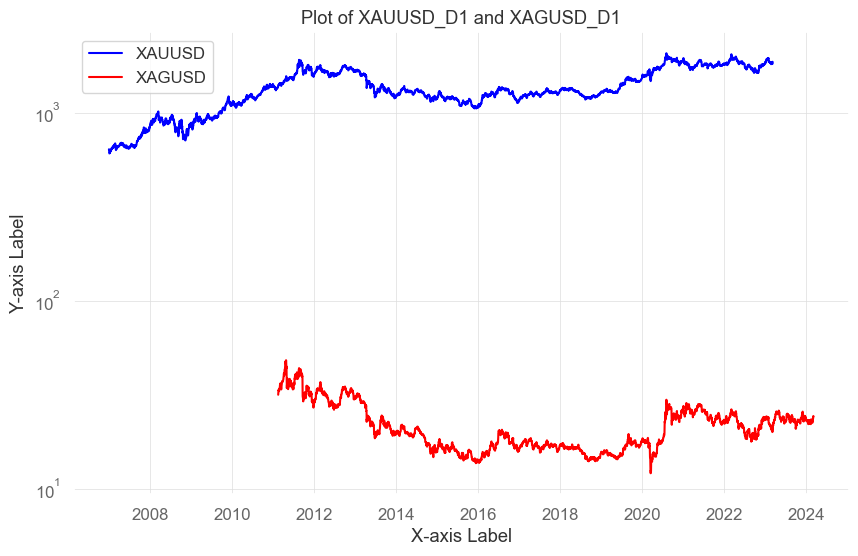

In [9]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [10]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],
                   data_2.loc['2007-03-05':'2023-03-01'])

In [11]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          6.658e+04
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:50:26   Log-Likelihood:                         -27125.
No. Observations:                3735   AIC:                                  5.425e+04
Df Residuals:                    3734   BIC:                                  5.426e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         64.8768      0.251    258.035      0.000      64.384      65.370
==============================================================================
Omnibus:                     1020.615   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2667.627
Skew:                          -1.466   Prob(JB):                         0.00
Kurtosis:                       5.922   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
result = KF.Run(currency='XAGUSD')

In [13]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.14166
Multiple (Buy-and-Hold):     1.536132
--------------------------------------
Out-/Underperformance:       -0.394472


CAGR:                        0.011071
Annualized Mean:             0.01101
Annualized Std:              0.022519
Sharpe Ratio:                0.488934
Sortino Ratio:               0.796789
Maximum Drawdown:            0.064479
Calmar Ratio:                0.171699
Max Drawdown Duration:       3467 Days
Kelly Criterion:             22.128621


### Save Result Backtest 

In [14]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [15]:
filename = f'{Currency_Pair}_{TF}.csv'

In [16]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2011-02-18
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          13.82%
CAGR﹪                     0.75%

Sharpe                     0.44
Prob. Sharpe Ratio         96.08%
Smart Sharpe               0.43
Sortino                    0.72
Smart Sortino              0.7
Sortino/√2                 0.51
Smart Sortino/√2           0.49
Omega                      1.11

Max Drawdown               -6.52%
Longest DD Days            3467
Volatility (ann.)          2.03%
Calmar                     0.11
Skew                       2.9
Kurtosis                   47.1

Expected Daily %           0.0%
Expected Monthly %         0.09%
Expected Yearly %          1.0%
Kelly Criterion            4.95%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.21%
Expected Shortfall (cVaR)  -0.21%

Max Consecutive Wins       10
Ma

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2013-09-03,2021-02-25,2023-03-01,3467,-6.523235,-6.121167
2,2011-12-29,2012-02-28,2012-06-03,158,-2.260013,-2.075345
3,2011-06-28,2011-07-18,2011-08-08,42,-1.913117,-1.888371
4,2012-07-27,2012-11-29,2013-08-25,395,-1.904742,-1.716757
5,2011-05-24,2011-05-31,2011-06-12,20,-1.357275,-1.247383


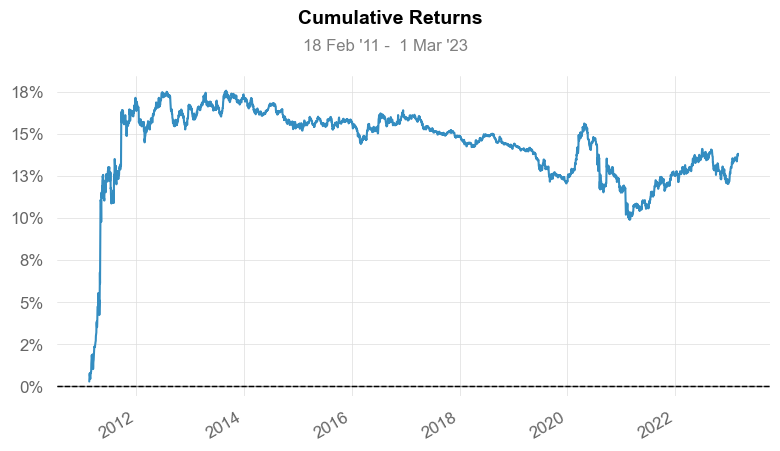

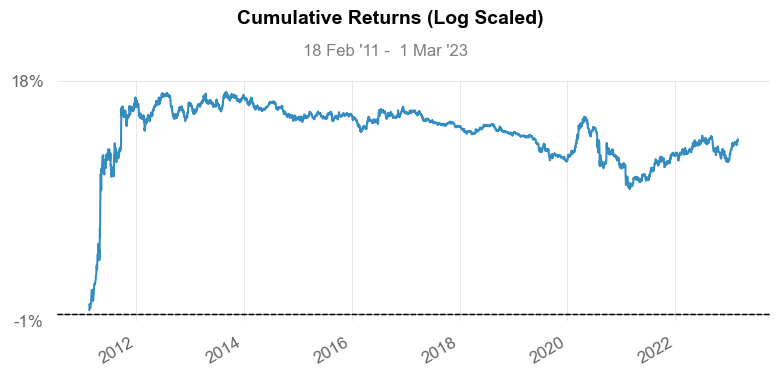

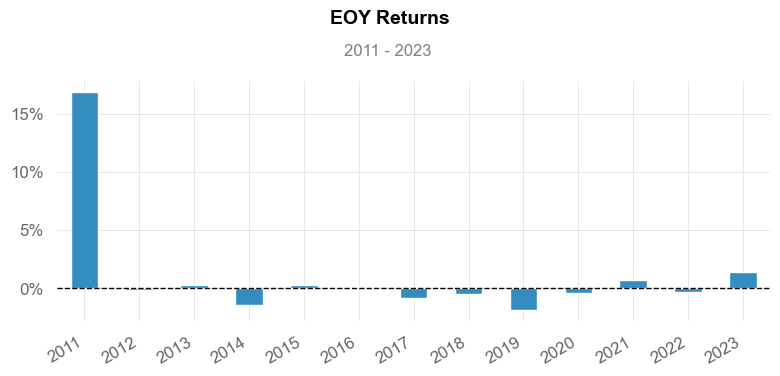

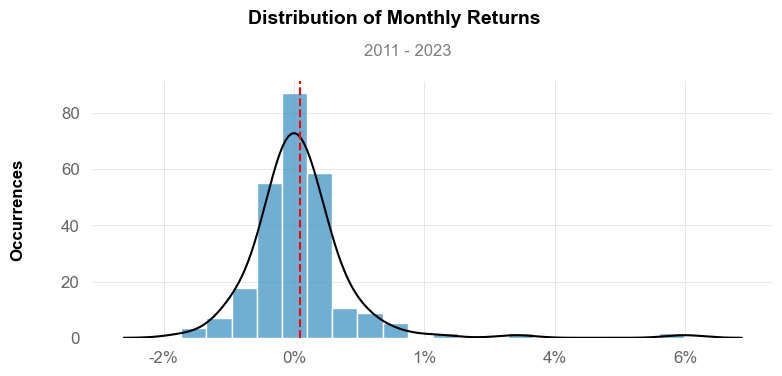

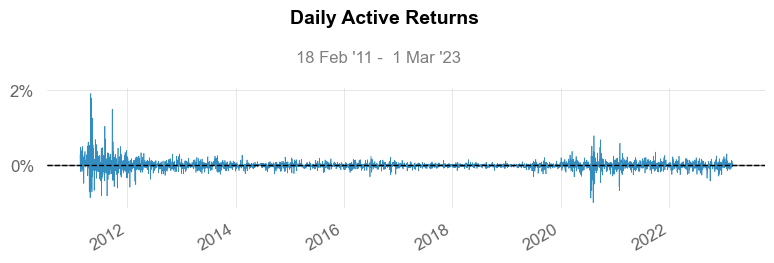

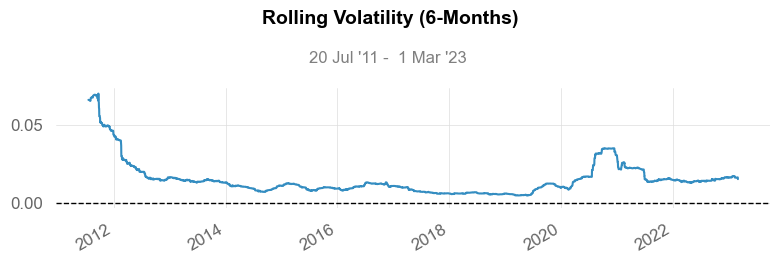

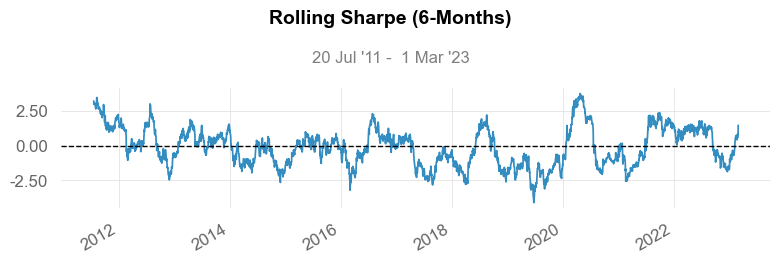

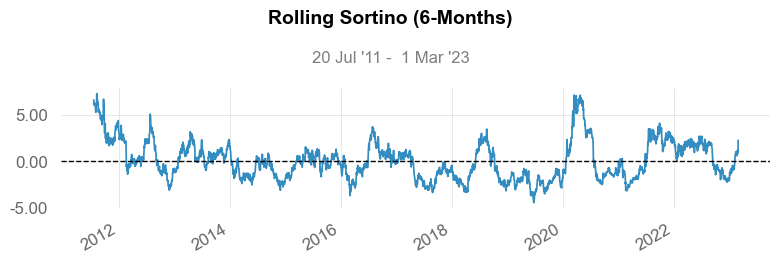

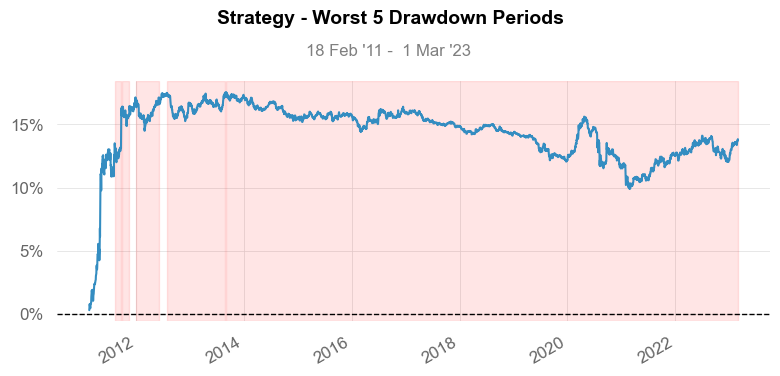

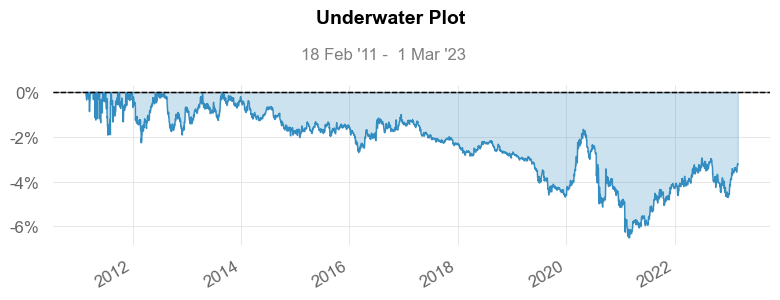

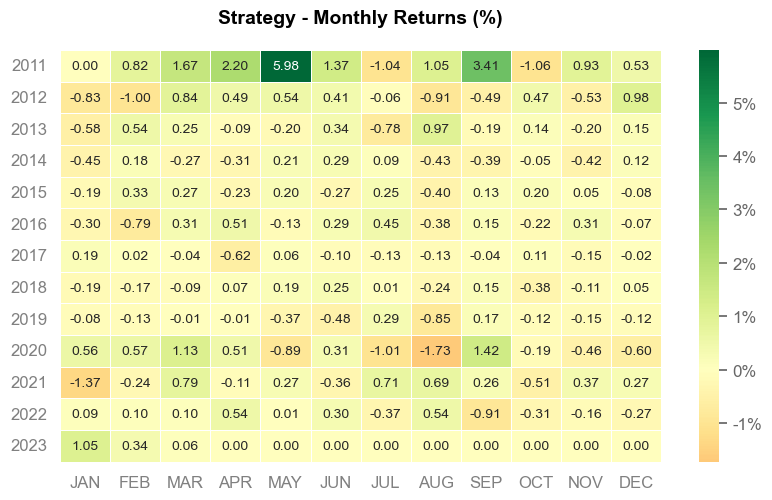

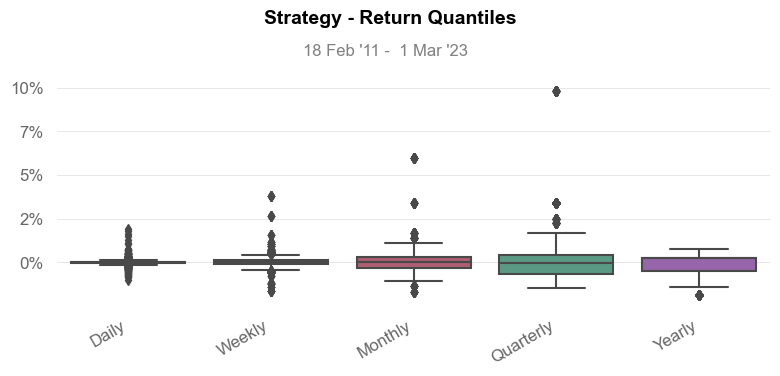

In [17]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H4

In [18]:
TF = 'H4'

In [19]:
data_1 = XAUUSD[TF]

In [20]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

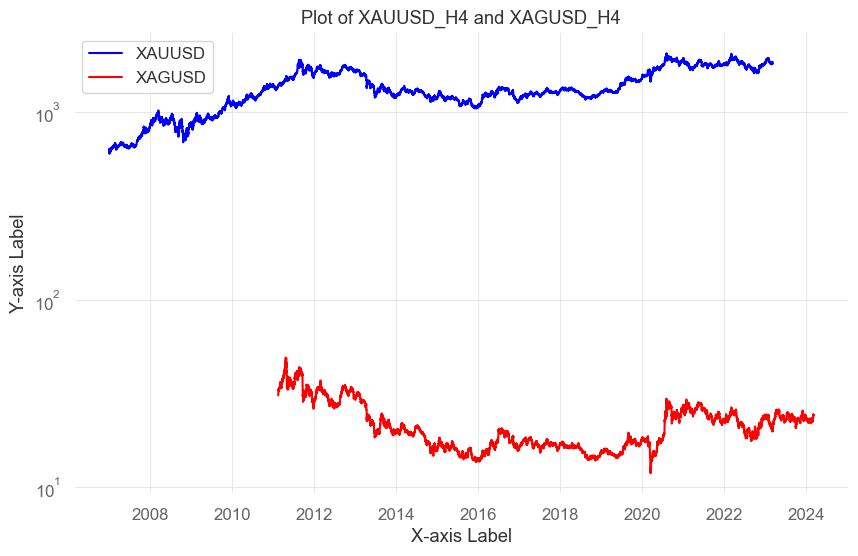

In [21]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [22]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],
                   data_2.loc['2007-03-05':'2023-03-01'])

In [23]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          3.456e+05
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:50:48   Log-Likelihood:                     -1.3923e+05
No. Observations:               19184   AIC:                                  2.785e+05
Df Residuals:                   19183   BIC:                                  2.785e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         64.9835      0.111    587.881      0.000      64.767      65.200
==============================================================================
Omnibus:                     5239.823   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13989.905
Skew:                          -1.471   Prob(JB):                         0.00
Kurtosis:                       5.975   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
result = KF.Run(currency='XAGUSD')

In [25]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.118344
Multiple (Buy-and-Hold):     1.529736
--------------------------------------
Out-/Underperformance:       -0.411392


CAGR:                        0.009339
Annualized Mean:             0.009295
Annualized Std:              0.023219
Sharpe Ratio:                0.40033
Sortino Ratio:               0.60952
Maximum Drawdown:            0.068275
Calmar Ratio:                0.13678
Max Drawdown Duration:       3467 Days
Kelly Criterion:             17.714123


### Save Result Backtest 

In [26]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [27]:
filename = f'{Currency_Pair}_{TF}.csv'

In [28]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2011-02-18
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          11.12%
CAGR﹪                     0.61%

Sharpe                     0.36
Prob. Sharpe Ratio         92.39%
Smart Sharpe               0.36
Sortino                    0.58
Smart Sortino              0.57
Sortino/√2                 0.41
Smart Sortino/√2           0.41
Omega                      1.09

Max Drawdown               -6.84%
Longest DD Days            3467
Volatility (ann.)          2.02%
Calmar                     0.09
Skew                       2.38
Kurtosis                   40.36

Expected Daily %           0.0%
Expected Monthly %         0.07%
Expected Yearly %          0.81%
Kelly Criterion            4.04%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.21%
Expected Shortfall (cVaR)  -0.21%

Max Consecutive Wins       1

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2013-09-03,2021-02-25,2023-03-01,3467,-6.836537,-6.427075
2,2011-12-29,2012-02-28,2012-06-03,158,-2.300566,-2.112584
3,2011-06-28,2011-07-18,2011-08-08,42,-2.014753,-1.989563
4,2012-07-27,2012-11-29,2013-09-01,402,-1.938813,-1.747466
5,2011-05-24,2011-05-31,2011-06-12,20,-1.381704,-1.269834


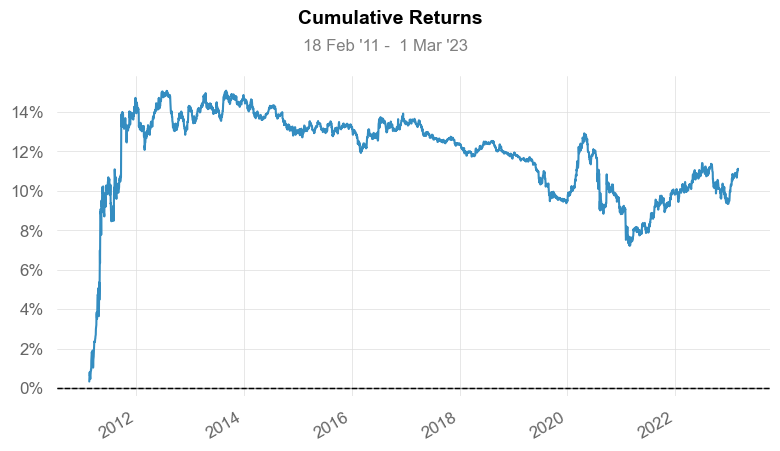

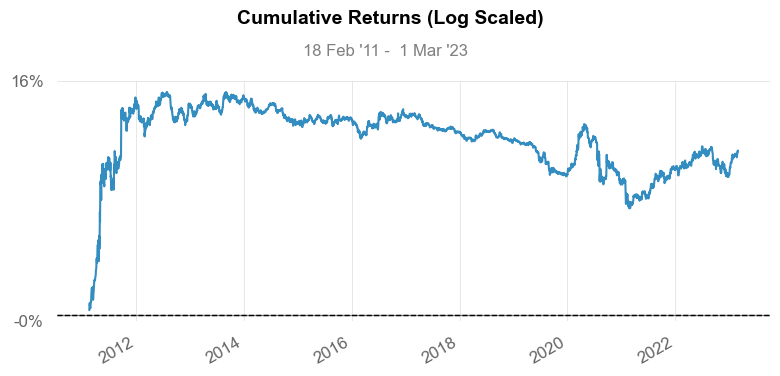

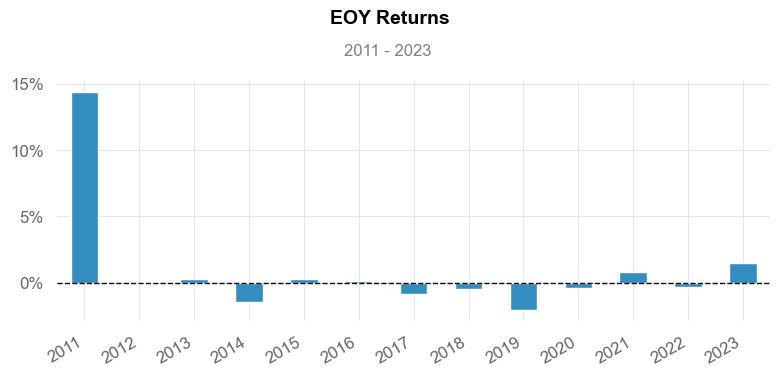

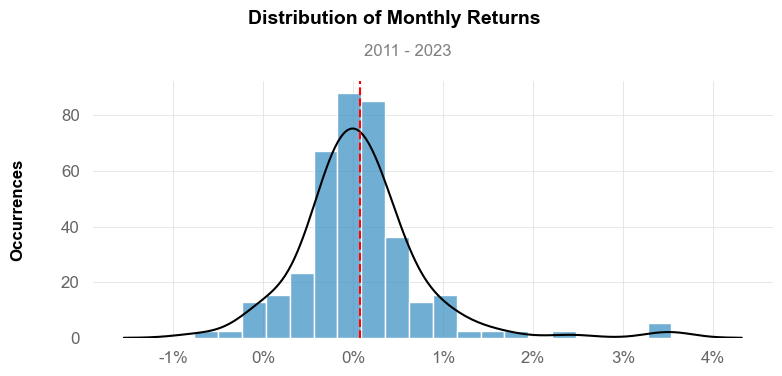

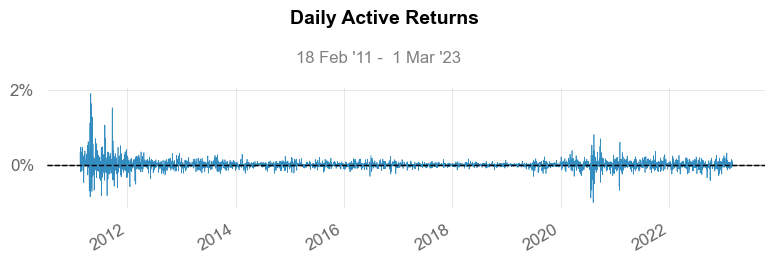

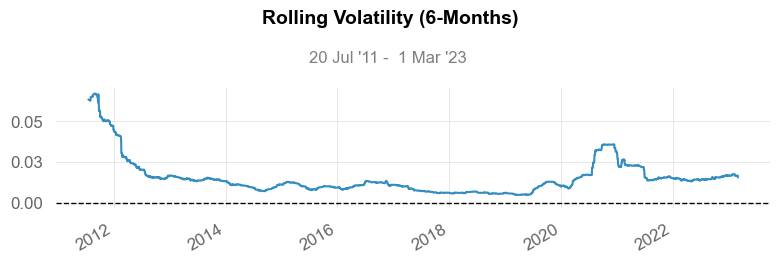

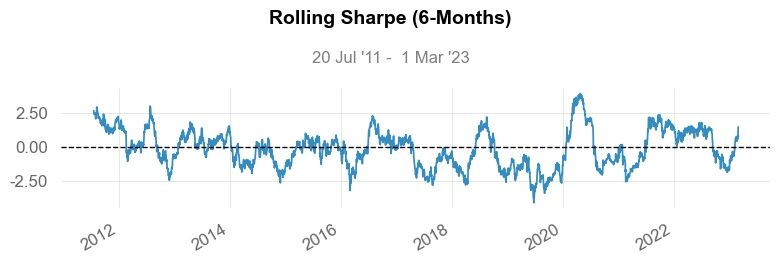

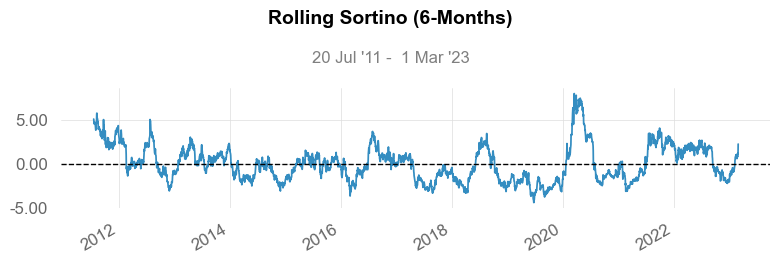

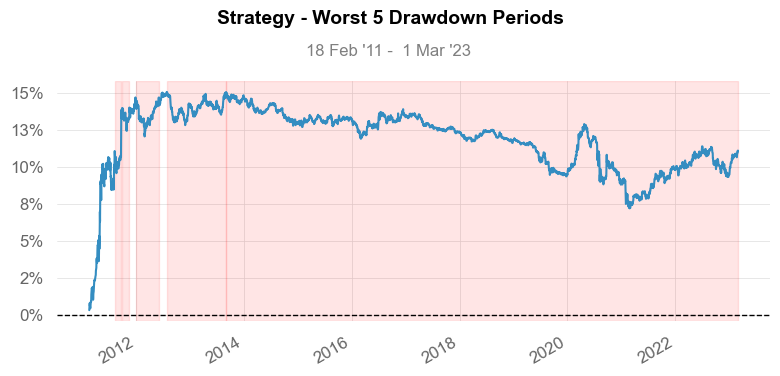

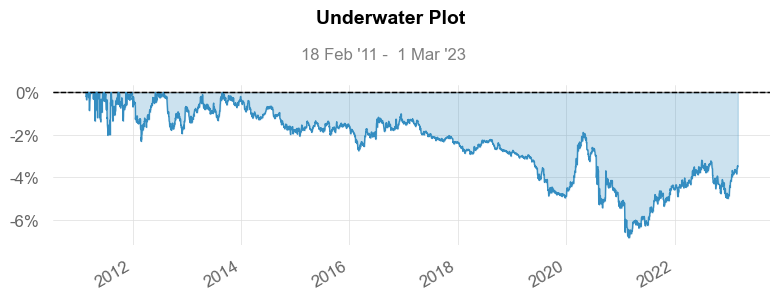

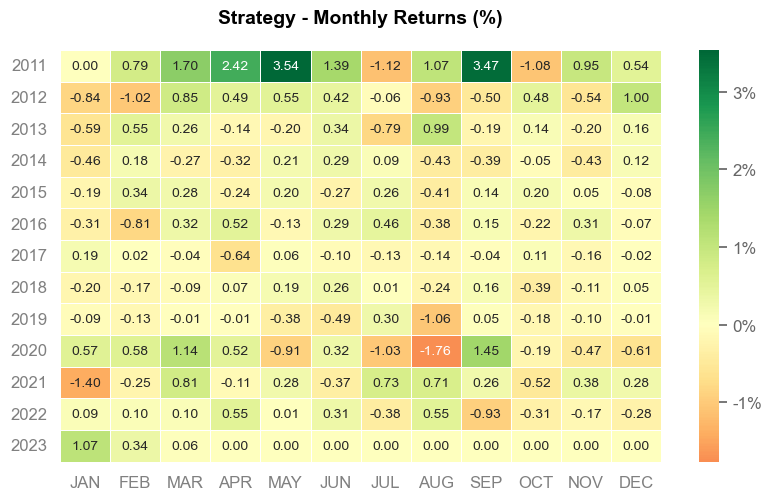

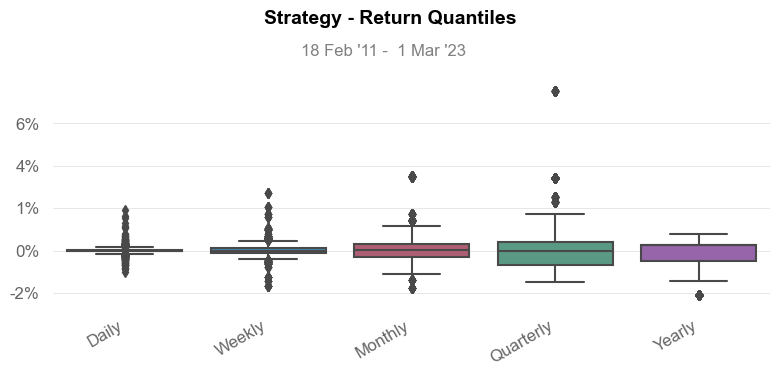

In [29]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H1

In [30]:
TF = 'H1'

In [31]:
data_1 = XAUUSD[TF]

In [32]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

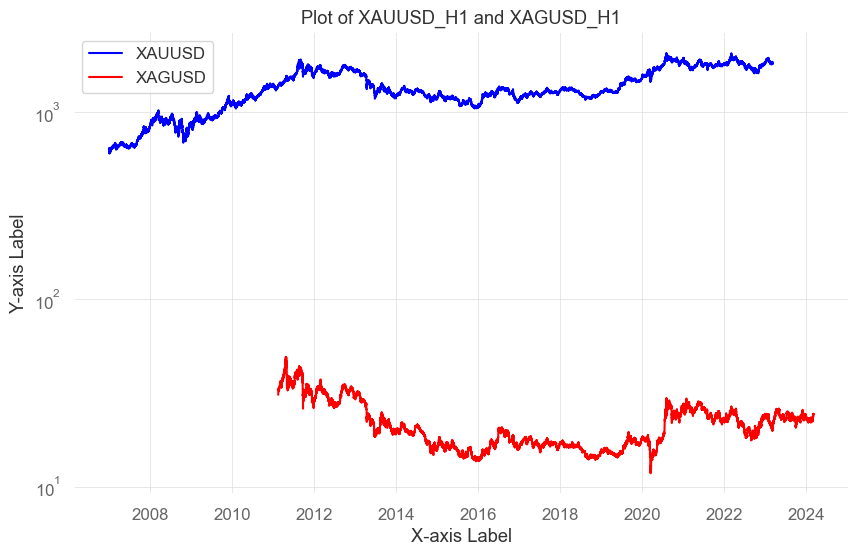

In [33]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [34]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],
                   data_2.loc['2007-03-05':'2023-03-01'])

In [35]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          1.281e+06
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:51:44   Log-Likelihood:                     -5.1738e+05
No. Observations:               71275   AIC:                                  1.035e+06
Df Residuals:                   71274   BIC:                                  1.035e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         64.8740      0.057   1131.619      0.000      64.762      64.986
==============================================================================
Omnibus:                    19149.986   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50315.857
Skew:                          -1.456   Prob(JB):                         0.00
Kurtosis:                       5.908   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
result = KF.Run(currency='XAGUSD')

### Save Result Backtest 

In [37]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [38]:
filename = f'{Currency_Pair}_{TF}.csv'

In [39]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2011-02-18
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          12.14%
CAGR﹪                     0.66%

Sharpe                     0.4
Prob. Sharpe Ratio         94.08%
Smart Sharpe               0.39
Sortino                    0.63
Smart Sortino              0.63
Sortino/√2                 0.44
Smart Sortino/√2           0.44
Omega                      1.09

Max Drawdown               -6.39%
Longest DD Days            3467
Volatility (ann.)          2.01%
Calmar                     0.1
Skew                       2.34
Kurtosis                   40.06

Expected Daily %           0.0%
Expected Monthly %         0.08%
Expected Yearly %          0.89%
Kelly Criterion            4.38%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.21%
Expected Shortfall (cVaR)  -0.21%

Max Consecutive Wins       10


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2013-09-03,2021-02-25,2023-03-01,3467,-6.385419,-5.977872
2,2011-12-29,2012-02-28,2012-06-03,158,-2.297165,-2.109461
3,2011-07-05,2011-07-18,2011-08-08,35,-1.936846,-1.911676
4,2012-07-27,2012-11-29,2013-08-14,384,-1.935956,-1.744891
5,2011-05-18,2011-05-31,2011-06-23,37,-1.504396,-1.392652


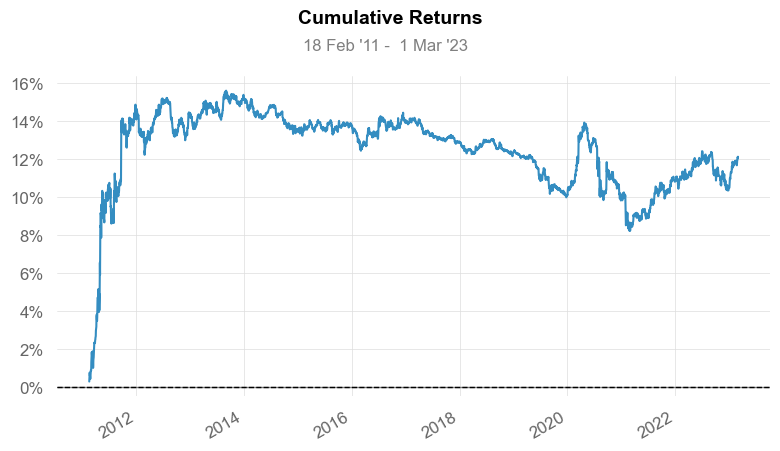

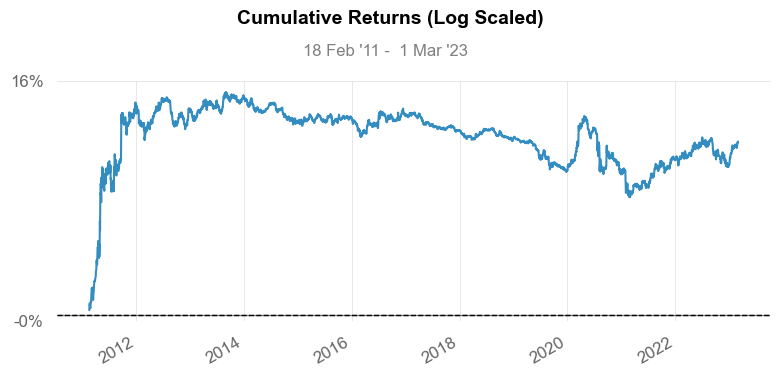

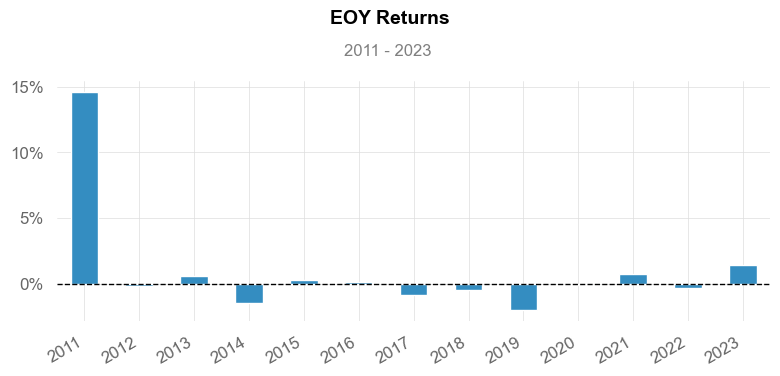

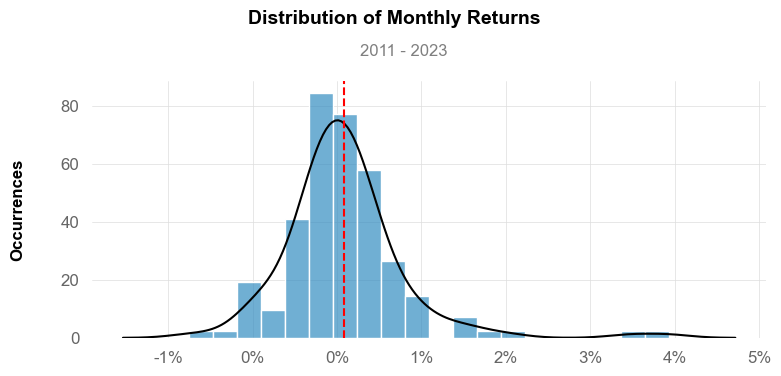

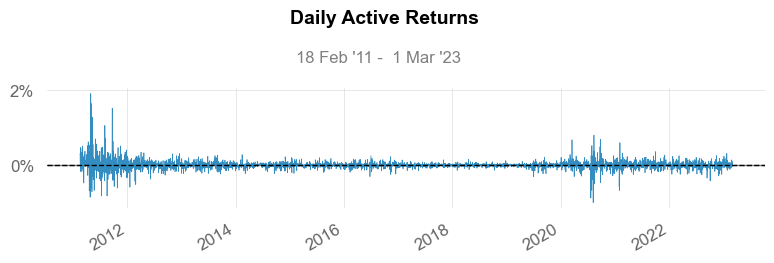

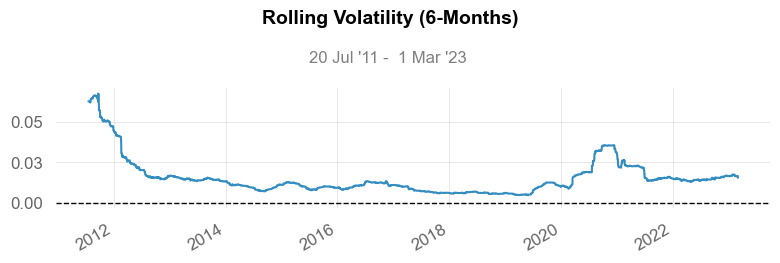

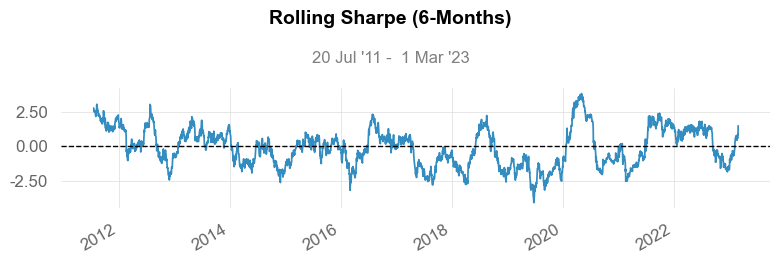

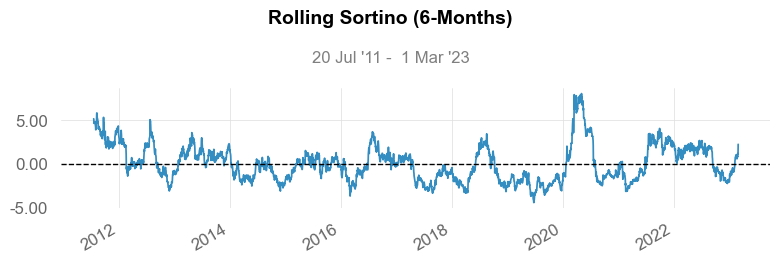

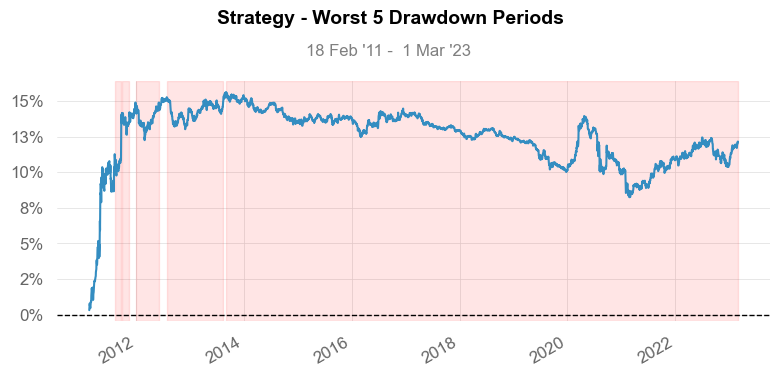

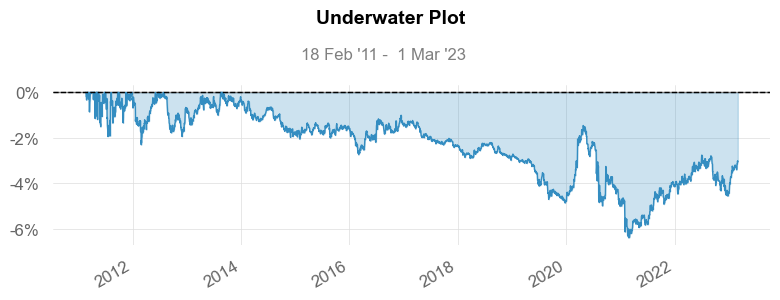

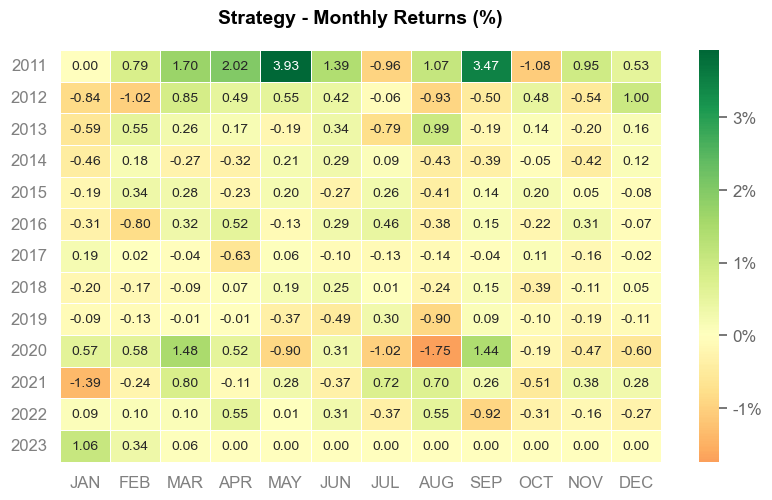

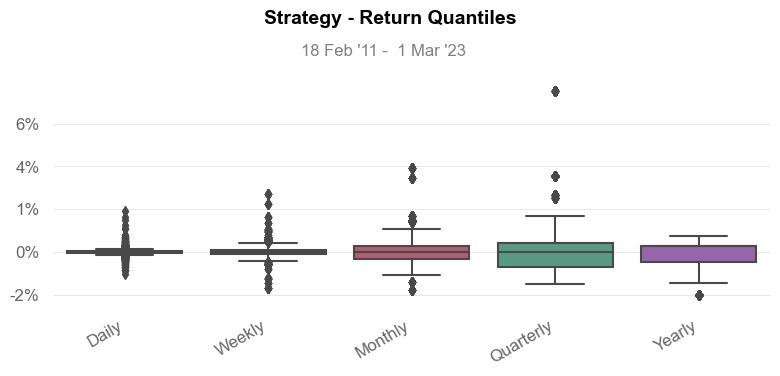

In [40]:
qs.reports.full(result['Equity'].resample('D').last(
).dropna().pct_change().resample('D').last().dropna())

## TF H30

In [41]:
TF = 'M30'

In [42]:
data_1 = XAUUSD[TF]

In [43]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

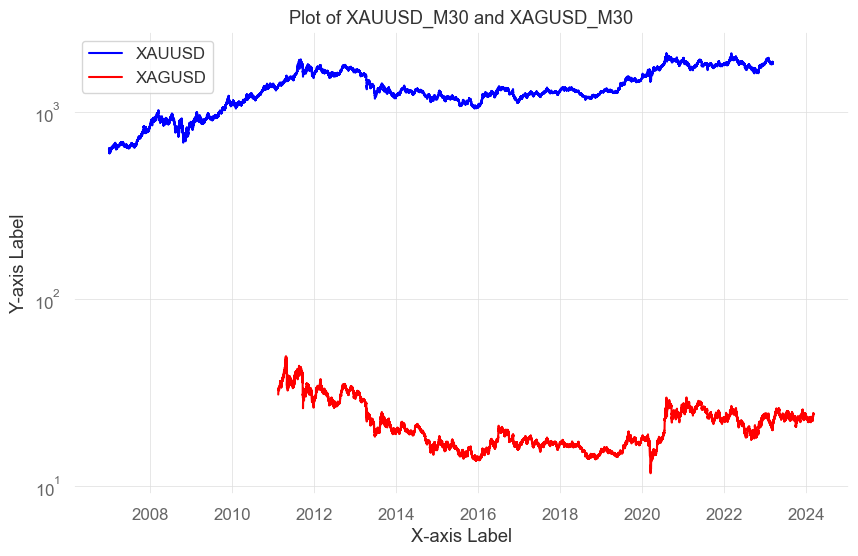

In [44]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [45]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],
                   data_2.loc['2007-03-05':'2023-03-01'])

In [46]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          2.562e+06
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:55:08   Log-Likelihood:                     -1.0303e+06
No. Observations:              141976   AIC:                                  2.061e+06
Df Residuals:                  141975   BIC:                                  2.061e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         64.9589      0.041   1600.564      0.000      64.879      65.038
==============================================================================
Omnibus:                    38321.572   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101277.770
Skew:                          -1.461   Prob(JB):                         0.00
Kurtosis:                       5.930   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
result = KF.Run(currency='XAGUSD')

### Save Result Backtest 

In [48]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [49]:
filename = f'{Currency_Pair}_{TF}.csv'

In [50]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2011-02-18
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          12.07%
CAGR﹪                     0.66%

Sharpe                     0.39
Prob. Sharpe Ratio         93.96%
Smart Sharpe               0.39
Sortino                    0.62
Smart Sortino              0.62
Sortino/√2                 0.44
Smart Sortino/√2           0.44
Omega                      1.09

Max Drawdown               -6.38%
Longest DD Days            3467
Volatility (ann.)          2.01%
Calmar                     0.1
Skew                       2.33
Kurtosis                   40.02

Expected Daily %           0.0%
Expected Monthly %         0.08%
Expected Yearly %          0.88%
Kelly Criterion            4.36%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.21%
Expected Shortfall (cVaR)  -0.21%

Max Consecutive Wins       10

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2013-09-03,2021-02-25,2023-03-01,3467,-6.381627,-5.973855
2,2011-12-29,2012-02-28,2012-06-03,158,-2.295640,-2.108060
3,2011-06-28,2011-07-18,2011-08-08,42,-2.073973,-2.048856
4,2012-07-27,2012-11-29,2013-08-22,392,-1.934675,-1.743736
5,2011-05-18,2011-05-31,2011-06-23,37,-1.446618,-1.335149


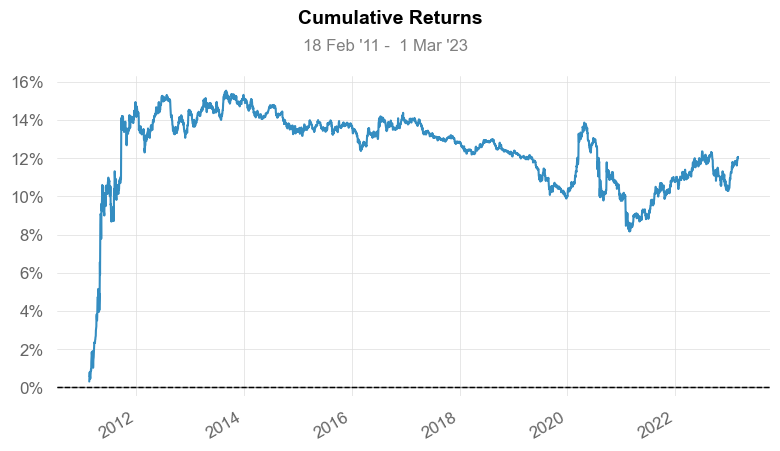

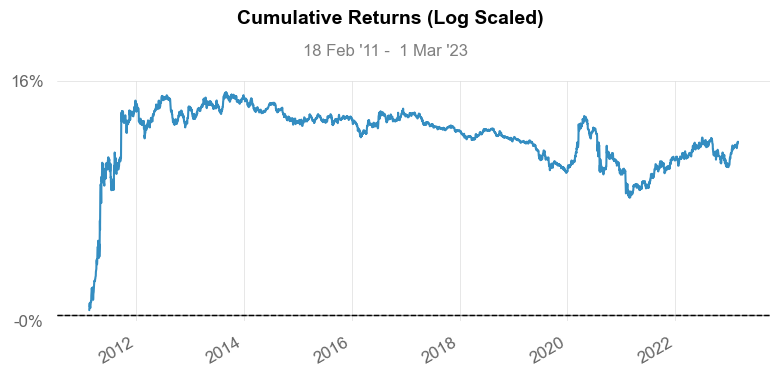

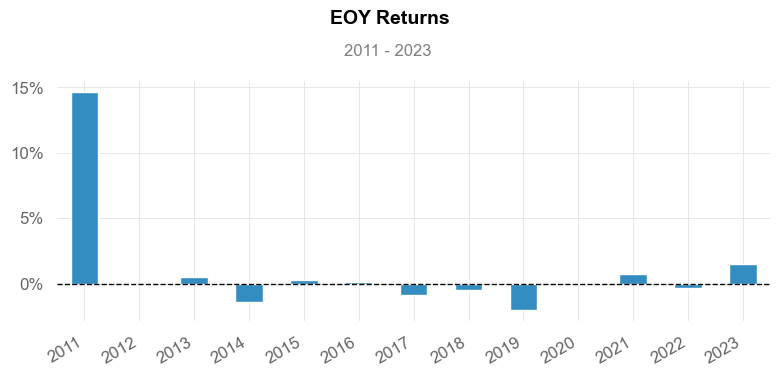

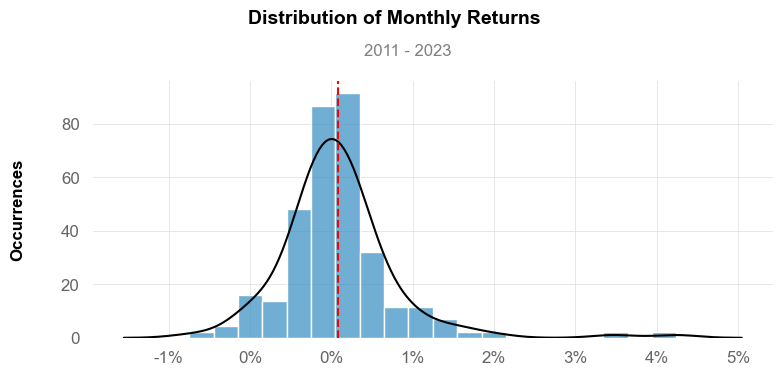

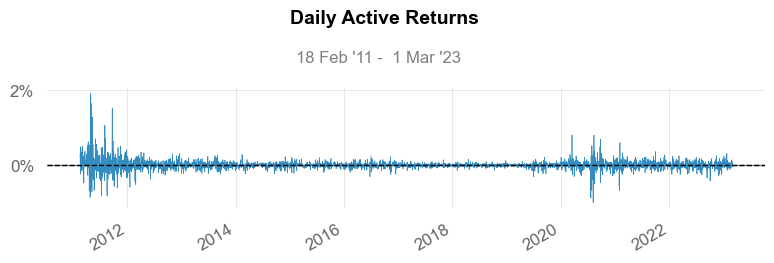

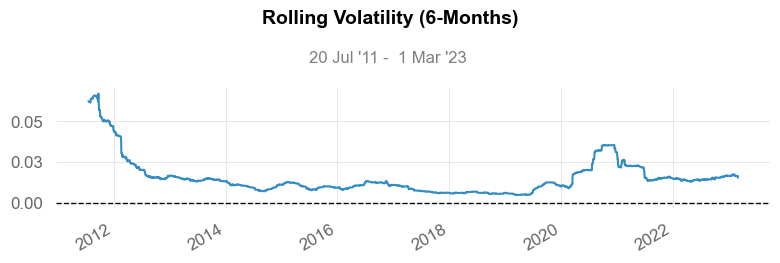

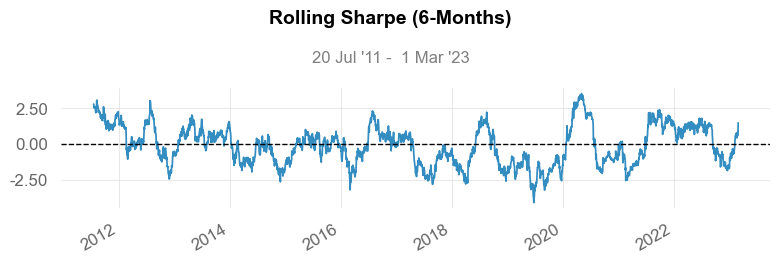

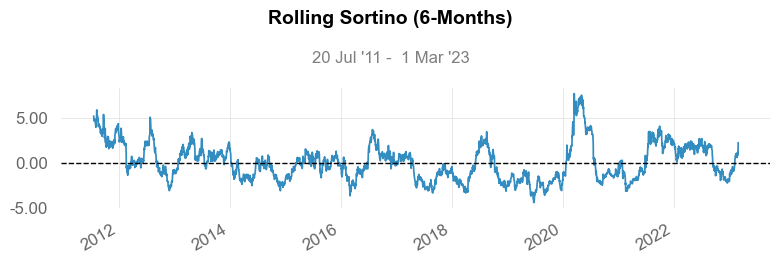

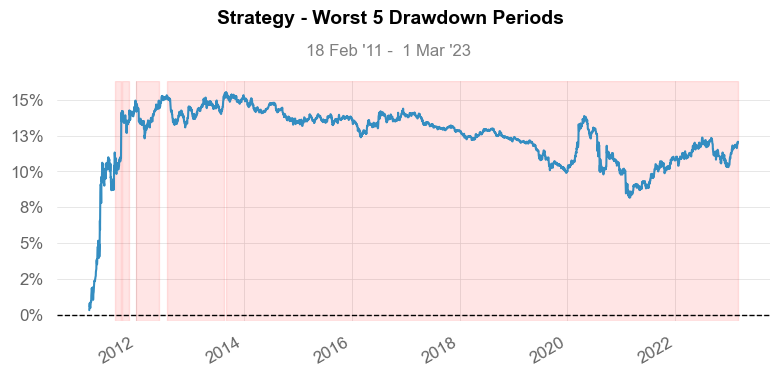

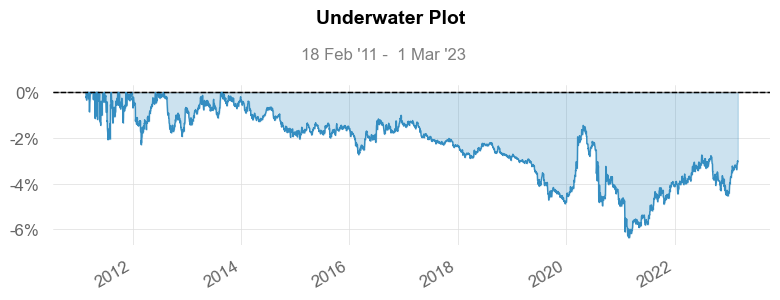

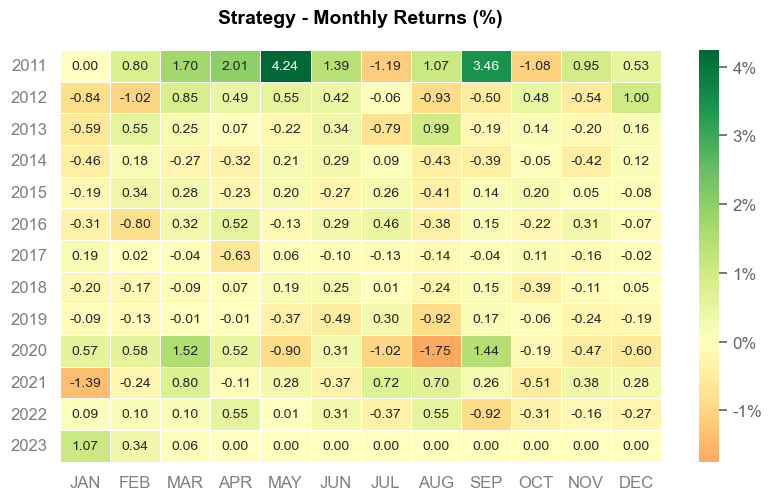

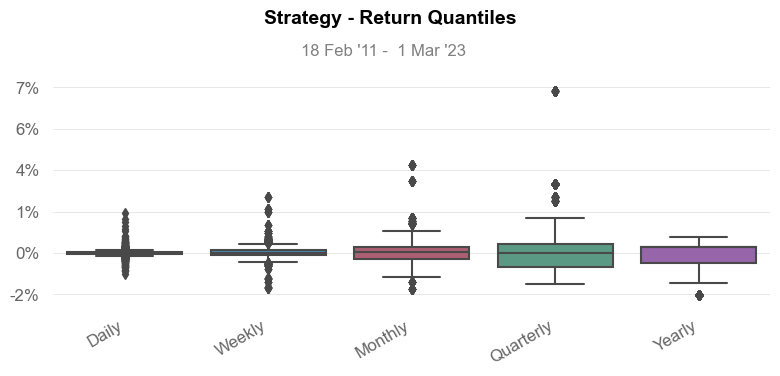

In [51]:
qs.reports.full(result['Equity'].resample('D').last(
).dropna().pct_change().resample('D').last().dropna())